# Insights from OBD Data


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb


In [58]:
def count_files(folder_path, file_extension):
    pattern = os.path.join(folder_path, f"*.{file_extension}")
    files = glob.glob(pattern)
    return len(files)

folder_path = "/home/omar/code/obd-project/dataset/10.35097-1130/data/dataset/OBD-II-Dataset"
file_extension = "csv"

count = count_files(folder_path, file_extension)
print(f"Number of {file_extension} files in {folder_path} is: {count}")

Number of csv files in /home/omar/code/obd-project/dataset/10.35097-1130/data/dataset/OBD-II-Dataset is: 81


In [59]:
path = "/home/omar/code/obd-project/dataset/10.35097-1130/data/dataset/OBD-II-Dataset"
all_files = glob.glob(path + "/*.csv")
df = pd.concat((pd.read_csv(f, encoding='utf-8') for f in all_files), ignore_index=True)

print(df)


                 Time  Engine Coolant Temperature [°C]  \
0        07:08:07.489                              8.0   
1        07:08:07.579                              8.0   
2        07:08:07.669                              8.0   
3        07:08:07.759                              8.0   
4        07:08:07.849                              8.0   
...               ...                              ...   
2693819  08:07:57.080                             89.0   
2693820  08:07:57.141                             89.0   
2693821  08:07:57.231                             89.0   
2693822  08:07:57.292                             89.0   
2693823  08:07:57.381                             89.0   

         Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
0                                            NaN               NaN   
1                                           97.0               NaN   
2                                           97.0               0.0   
3                      

# Exploratory analysis

In [60]:
print(df.head())

           Time  Engine Coolant Temperature [°C]  \
0  07:08:07.489                              8.0   
1  07:08:07.579                              8.0   
2  07:08:07.669                              8.0   
3  07:08:07.759                              8.0   
4  07:08:07.849                              8.0   

   Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
0                                      NaN               NaN   
1                                     97.0               NaN   
2                                     97.0               0.0   
3                                     97.0               0.0   
4                                     97.0               0.0   

   Vehicle Speed Sensor [km/h]  Intake Air Temperature [°C]  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          NaN                          NaN   
3                          0.0                    

In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693824 entries, 0 to 2693823
Data columns (total 14 columns):
 #   Column                                     Dtype  
---  ------                                     -----  
 0   Time                                       object 
 1   Engine Coolant Temperature [°C]            float64
 2   Intake Manifold Absolute Pressure [kPa]    float64
 3   Engine RPM [RPM]                           float64
 4   Vehicle Speed Sensor [km/h]                float64
 5   Intake Air Temperature [°C]                float64
 6   Air Flow Rate from Mass Flow Sensor [g/s]  float64
 7   Absolute Throttle Position [%]             float64
 8   Ambient Air Temperature [°C]               float64
 9   Accelerator Pedal Position D [%]           float64
 10  Accelerator Pedal Position E [%]           float64
 11  Engine Coolant Temperature [Â°C]           float64
 12  Intake Air Temperature [Â°C]               float64
 13  Ambient Air Temperature [Â°C]             

In [62]:
df.shape

(2693824, 14)

In [63]:
print(df.isnull().sum())

Time                                               0
Engine Coolant Temperature [°C]              1262431
Intake Manifold Absolute Pressure [kPa]           88
Engine RPM [RPM]                                 169
Vehicle Speed Sensor [km/h]                      240
Intake Air Temperature [°C]                  1262589
Air Flow Rate from Mass Flow Sensor [g/s]        402
Absolute Throttle Position [%]                   483
Ambient Air Temperature [°C]                 1262715
Accelerator Pedal Position D [%]                 654
Accelerator Pedal Position E [%]                 725
Engine Coolant Temperature [Â°C]             1431400
Intake Air Temperature [Â°C]                 1431556
Ambient Air Temperature [Â°C]                1431673
dtype: int64


In [64]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S.%f')


# Analysis
From observing the files, each csv file corresponds to a trip. Dropping the null values here gets rid of the initial phase of the engine.

In [65]:
df = pd.read_csv("dataset/10.35097-1130/data/dataset/OBD-II-Dataset/2017-07-05_Seat_Leon_RT_S_Stau.csv")
df["Time"] = pd.to_datetime(df["Time"], format='%H:%M:%S.%f')
df.set_index("Time")
df.head

<bound method NDFrame.head of                          Time  Engine Coolant Temperature [Â°C]  \
0     1900-01-01 07:16:30.444                                31   
1     1900-01-01 07:16:30.535                                31   
2     1900-01-01 07:16:30.625                                31   
3     1900-01-01 07:16:30.716                                31   
4     1900-01-01 07:16:30.814                                31   
...                       ...                               ...   
46344 1900-01-01 08:22:15.439                                91   
46345 1900-01-01 08:22:15.524                                91   
46346 1900-01-01 08:22:15.615                                91   
46347 1900-01-01 08:22:15.704                                91   
46348 1900-01-01 08:22:15.794                                91   

       Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
0                                          NaN               NaN   
1                            

In [66]:
df.iloc[:15]

,Time,Engine Coolant Temperature [Â°C],Intake Manifold Absolute Pressure [kPa],Engine RPM [RPM],Vehicle Speed Sensor [km/h],Intake Air Temperature [Â°C],Air Flow Rate from Mass Flow Sensor [g/s],Absolute Throttle Position [%],Ambient Air Temperature [Â°C],Accelerator Pedal Position D [%],Accelerator Pedal Position E [%]
0,1900-01-01 07:16:30.444,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1900-01-01 07:16:30.535,31,96.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1900-01-01 07:16:30.625,31,96.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1900-01-01 07:16:30.716,31,96.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,1900-01-01 07:16:30.814,31,96.0,0.0,0.0,22.0,NaN,NaN,NaN,NaN,NaN
5,1900-01-01 07:16:30.895,31,96.0,0.0,0.0,22.0,0.91,NaN,NaN,NaN,NaN
6,1900-01-01 07:16:30.987,31,96.0,0.0,0.0,22.0,0.91,89.0,NaN,NaN,NaN
7,1900-01-01 07:16:31.075,31,96.0,0.0,0.0,22.0,0.91,89.0,21.0,NaN,NaN
8,1900-01-01 07:16:31.167,31,96.0,0.0,0.0,22.0,0.91,89.0,21.0,14.1,NaN
9,1900-01-01 07:16:31.257,31,96.0,0.0,0.0,22.0,0.91,89.0,21.0,14.1,14.5


- For the first second after starting the car, the sensors are being initialized so not all the data is populated, so we will use the data from the 10th row onwards

In [67]:
data = df.iloc[10:]
data.head

<bound method NDFrame.head of                          Time  Engine Coolant Temperature [Â°C]  \
10    1900-01-01 07:16:31.345                                31   
11    1900-01-01 07:16:31.435                                31   
12    1900-01-01 07:16:31.525                                31   
13    1900-01-01 07:16:31.615                                31   
14    1900-01-01 07:16:31.705                                31   
...                       ...                               ...   
46344 1900-01-01 08:22:15.439                                91   
46345 1900-01-01 08:22:15.524                                91   
46346 1900-01-01 08:22:15.615                                91   
46347 1900-01-01 08:22:15.704                                91   
46348 1900-01-01 08:22:15.794                                91   

       Intake Manifold Absolute Pressure [kPa]  Engine RPM [RPM]  \
10                                        96.0               0.0   
11                           

In [86]:
feature="Engine Coolant Temperature"
# data.set_index("Time", inplace=True)
X = data.drop(columns=[feature])
y = data[feature]


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [72]:
y_pred = model.predict(X_test_scaled)

In [73]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 174.7444801313201


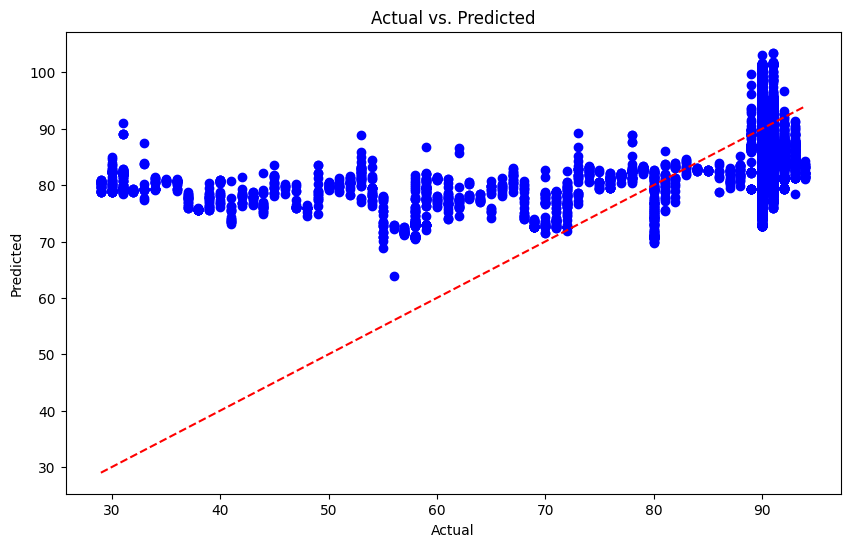

In [74]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

In [75]:
print(y)

Time
1900-01-01 07:16:31.345    31
1900-01-01 07:16:31.435    31
1900-01-01 07:16:31.525    31
1900-01-01 07:16:31.615    31
1900-01-01 07:16:31.705    31
                           ..
1900-01-01 08:22:15.439    91
1900-01-01 08:22:15.524    91
1900-01-01 08:22:15.615    91
1900-01-01 08:22:15.704    91
1900-01-01 08:22:15.794    91
Name: Engine Coolant Temperature [Â°C], Length: 46339, dtype: int64


In [ ]:
data.rename(columns={'Engine Coolant Temperature [Â°C]': 'Engine Coolant Temperature', 'Intake Manifold Absolute Pressure [kPa]':'Intake Manifold Absolute Pressure','Engine RPM [RPM]':'Engine RPM', 'Vehicle Speed Sensor [km/h]':'Vehicle Speed Sensor', 'Intake Air Temperature [Â°C]': 'Intake Air Temperature',	'Air Flow Rate from Mass Flow Sensor [g/s]':'Air Flow Rate from Mass Flow Sensor',	'Absolute Throttle Position [%]':'Absolute Throttle Position',	'Ambient Air Temperature [Â°C]':'Ambient Air Temperature',	'Accelerator Pedal Position D [%]':'Accelerator Pedal Position D', 'Accelerator Pedal Position E [%]':'Accelerator Pedal Position E'}, inplace=True)

/tmp/ipykernel_12823/2274475600.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns={'Engine Coolant Temperature [Â°C]': 'Engine Coolant Temperature', 'Intake Manifold Absolute Pressure [kPa]':'Intake Manifold Absolute Pressure','Engine RPM [RPM]':'Engine RPM', 'Vehicle Speed Sensor [km/h]':'Vehicle Speed Sensor', 'Intake Air Temperature [Â°C]': 'Intake Air Temperature',	'Air Flow Rate from Mass Flow Sensor [g/s]':'Air Flow Rate from Mass Flow Sensor',	'Absolute Throttle Position [%]':'Absolute Throttle Position',	'Ambient Air Temperature [Â°C]':'Ambient Air Temperature',	'Accelerator Pedal Position D [%]':'Accelerator Pedal Position D', 'Accelerator Pedal Position E [%]':'Accelerator Pedal Position E'}, inplace=True)


In [89]:
model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [90]:
y_pred = model.predict(X_test_scaled)

In [93]:
model.score(X_test, y_test)

0.9049155712127686

In [94]:
model.score(X_train, y_train) 

0.9090491533279419

In [91]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 957.4590689898541


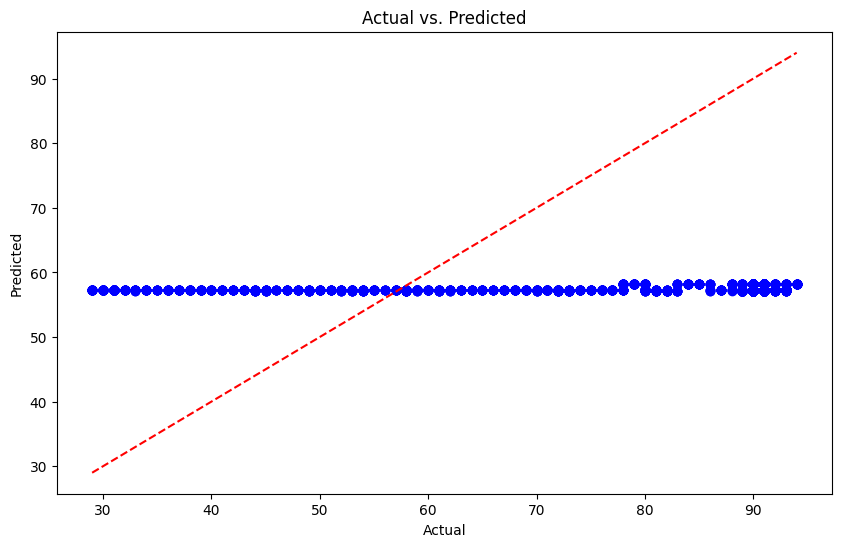

In [92]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

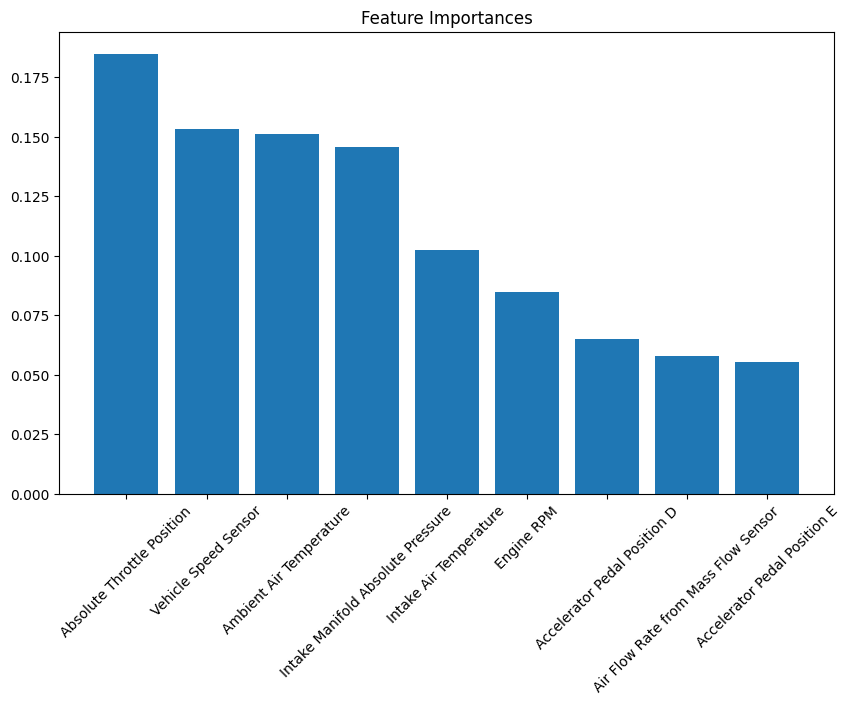

In [97]:
importances=model.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns
# Plot
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), np.array(feature_names)[indices], rotation=45)
plt.title("Feature Importances")
plt.show()

In [98]:
data.describe

<bound method NDFrame.describe of                          Engine Coolant Temperature  \
Time                                                  
1900-01-01 07:16:31.345                          31   
1900-01-01 07:16:31.435                          31   
1900-01-01 07:16:31.525                          31   
1900-01-01 07:16:31.615                          31   
1900-01-01 07:16:31.705                          31   
...                                             ...   
1900-01-01 08:22:15.439                          91   
1900-01-01 08:22:15.524                          91   
1900-01-01 08:22:15.615                          91   
1900-01-01 08:22:15.704                          91   
1900-01-01 08:22:15.794                          91   

                         Intake Manifold Absolute Pressure  Engine RPM  \
Time                                                                     
1900-01-01 07:16:31.345                               96.0         0.0   
1900-01-01 07:16:31.435     

In [99]:
data.info

<bound method DataFrame.info of                          Engine Coolant Temperature  \
Time                                                  
1900-01-01 07:16:31.345                          31   
1900-01-01 07:16:31.435                          31   
1900-01-01 07:16:31.525                          31   
1900-01-01 07:16:31.615                          31   
1900-01-01 07:16:31.705                          31   
...                                             ...   
1900-01-01 08:22:15.439                          91   
1900-01-01 08:22:15.524                          91   
1900-01-01 08:22:15.615                          91   
1900-01-01 08:22:15.704                          91   
1900-01-01 08:22:15.794                          91   

                         Intake Manifold Absolute Pressure  Engine RPM  \
Time                                                                     
1900-01-01 07:16:31.345                               96.0         0.0   
1900-01-01 07:16:31.435       

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (make sure to replace this with the actual file path)
# df = pd.read_csv('your_dataset.csv', index_col='Time', parse_dates=True)

# Check for missing values
print(df.isnull().sum())

# # Handle missing values by forward-fill (you could also try other methods like interpolation)
# df.fillna(method='ffill', inplace=True)

# Feature engineering: Add any derived features (e.g., acceleration, etc.)
df['acceleration'] = df['Vehicle Speed Sensor'].diff() / df.index.to_series().diff().dt.total_seconds()

# Define target variable - you might have a specific column for fuel consumption
# For the sake of the example, we will assume you are estimating it from Air Flow Rate and Throttle Position
# You should adjust this depending on your actual data and formula
df.rename(columns={'Engine Coolant Temperature [Â°C]': 'Engine Coolant Temperature', 'Intake Manifold Absolute Pressure [kPa]':'Intake Manifold Absolute Pressure','Engine RPM [RPM]':'Engine RPM', 'Vehicle Speed Sensor [km/h]':'Vehicle Speed Sensor', 'Intake Air Temperature [Â°C]': 'Intake Air Temperature',	'Air Flow Rate from Mass Flow Sensor [g/s]':'Air Flow Rate from Mass Flow Sensor',	'Absolute Throttle Position [%]':'Absolute Throttle Position',	'Ambient Air Temperature [Â°C]':'Ambient Air Temperature',	'Accelerator Pedal Position D [%]':'Accelerator Pedal Position D', 'Accelerator Pedal Position E [%]':'Accelerator Pedal Position E'}, inplace=True)
df['fuel_consumption'] = df['Air Flow Rate from Mass Flow Sensor'] * (df['Absolute Throttle Position'] / 100)

# Drop the target column from features
X = df.drop(columns=['fuel_consumption'])
y = df['fuel_consumption']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize the features (important for some algorithms)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Time                                         0
Engine Coolant Temperature [Â°C]             0
Intake Manifold Absolute Pressure [kPa]      1
Engine RPM [RPM]                             2
Vehicle Speed Sensor [km/h]                  3
Intake Air Temperature [Â°C]                 4
Air Flow Rate from Mass Flow Sensor [g/s]    5
Absolute Throttle Position [%]               6
Ambient Air Temperature [Â°C]                7
Accelerator Pedal Position D [%]             8
Accelerator Pedal Position E [%]             9
dtype: int64


/tmp/ipykernel_12823/334231768.py:17: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


KeyError: 'Vehicle Speed Sensor'